In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
store = pd.read_csv('store.csv')

In [5]:
store.head()

,ZIP_CODE,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,1001,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,...,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,1028,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,...,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,1056,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,...,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,1118,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,...,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,1107,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,...,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [6]:
valphon_dict = {'N':0,'Y':1}

In [7]:
store['VALPHON'] = store['VALPHON'].replace(valphon_dict)

In [8]:
store['VALPHON']

0        0
1        1
2        0
3        1
4        1
        ..
21735    1
21736    0
21737    0
21738    1
21739    1
Name: VALPHON, Length: 21740, dtype: int64

In [9]:
store = store.drop(['ZIP_CODE'],axis=1)
store.head()

,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,...,0,0,5,0,0.00,31.81,111.00,10,0.00,0
1,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,...,1,0,4,2,50.00,32.72,43.50,10,0.03,1
2,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,...,0,0,4,0,0.00,100.00,68.60,16,0.00,0
3,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,...,1,0,9,6,66.67,23.27,26.96,10,0.00,0
4,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,...,1,0,0,0,0.00,28.52,24.50,20,0.00,0


## Feature engineering 

In [10]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FRE           21740 non-null  int64  
 1   MON           21740 non-null  float64
 2   CC_CARD       21740 non-null  int64  
 3   AVRG          21740 non-null  float64
 4   PC_CALC20     21740 non-null  int64  
 5   PSWEATERS     21740 non-null  float64
 6   PKNIT_TOPS    21740 non-null  float64
 7   PKNIT_DRES    21740 non-null  float64
 8   PBLOUSES      21740 non-null  float64
 9   PJACKETS      21740 non-null  float64
 10  PCAR_PNTS     21740 non-null  float64
 11  PCAS_PNTS     21740 non-null  float64
 12  PSHIRTS       21740 non-null  float64
 13  PDRESSES      21740 non-null  float64
 14  PSUITS        21740 non-null  float64
 15  POUTERWEAR    21740 non-null  float64
 16  PJEWELRY      21740 non-null  float64
 17  PFASHION      21740 non-null  float64
 18  PLEGWEAR      21740 non-nu

In [11]:
from dabl import detect_types
types = detect_types(store)
types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
FRE,False,False,True,False,False,False,False
MON,True,False,False,False,False,False,False
CC_CARD,False,False,False,True,False,False,False
AVRG,True,False,False,False,False,False,False
PC_CALC20,False,False,True,False,False,False,False
PSWEATERS,True,False,False,False,False,False,False
PKNIT_TOPS,True,False,False,False,False,False,False
PKNIT_DRES,True,False,False,False,False,False,False
PBLOUSES,True,False,False,False,False,False,False
PJACKETS,True,False,False,False,False,False,False


In [12]:
categorical = (types[types['categorical'] == True]).index.to_list()
categorical

['CC_CARD', 'VALPHON', 'RESP']

In [13]:
categorical = ['CC_CARD','VALPHON'] #RESP is label, no need it

In [14]:
num = (types[types['categorical'] == False]).index.to_list()
num

['FRE',
 'MON',
 'AVRG',
 'PC_CALC20',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',
 'AMSPEND',
 'PSSPEND',
 'CCSPEND',
 'AXSPEND',
 'TMONSPEND',
 'OMONSPEND',
 'SMONSPEND',
 'PREVPD',
 'GMP',
 'PROMOS',
 'DAYS',
 'FREDAYS',
 'MARKDOWN',
 'CLASSES',
 'COUPONS',
 'STYLES',
 'STORES',
 'WEB',
 'MAILED',
 'RESPONDED',
 'RESPONSERATE',
 'HI',
 'LTFREDAY',
 'CLUSTYPE',
 'PERCRET']

### Discrete and categorical predictors

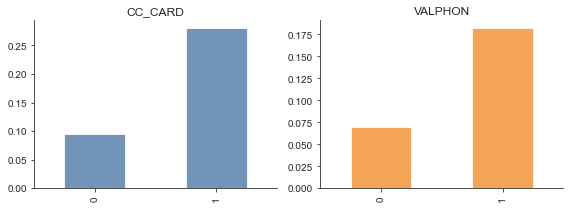

In [15]:
from tutorial4 import crosstabplots

crosstabplots(store[categorical], store['RESP'])
plt.show()


### Continuous predictors

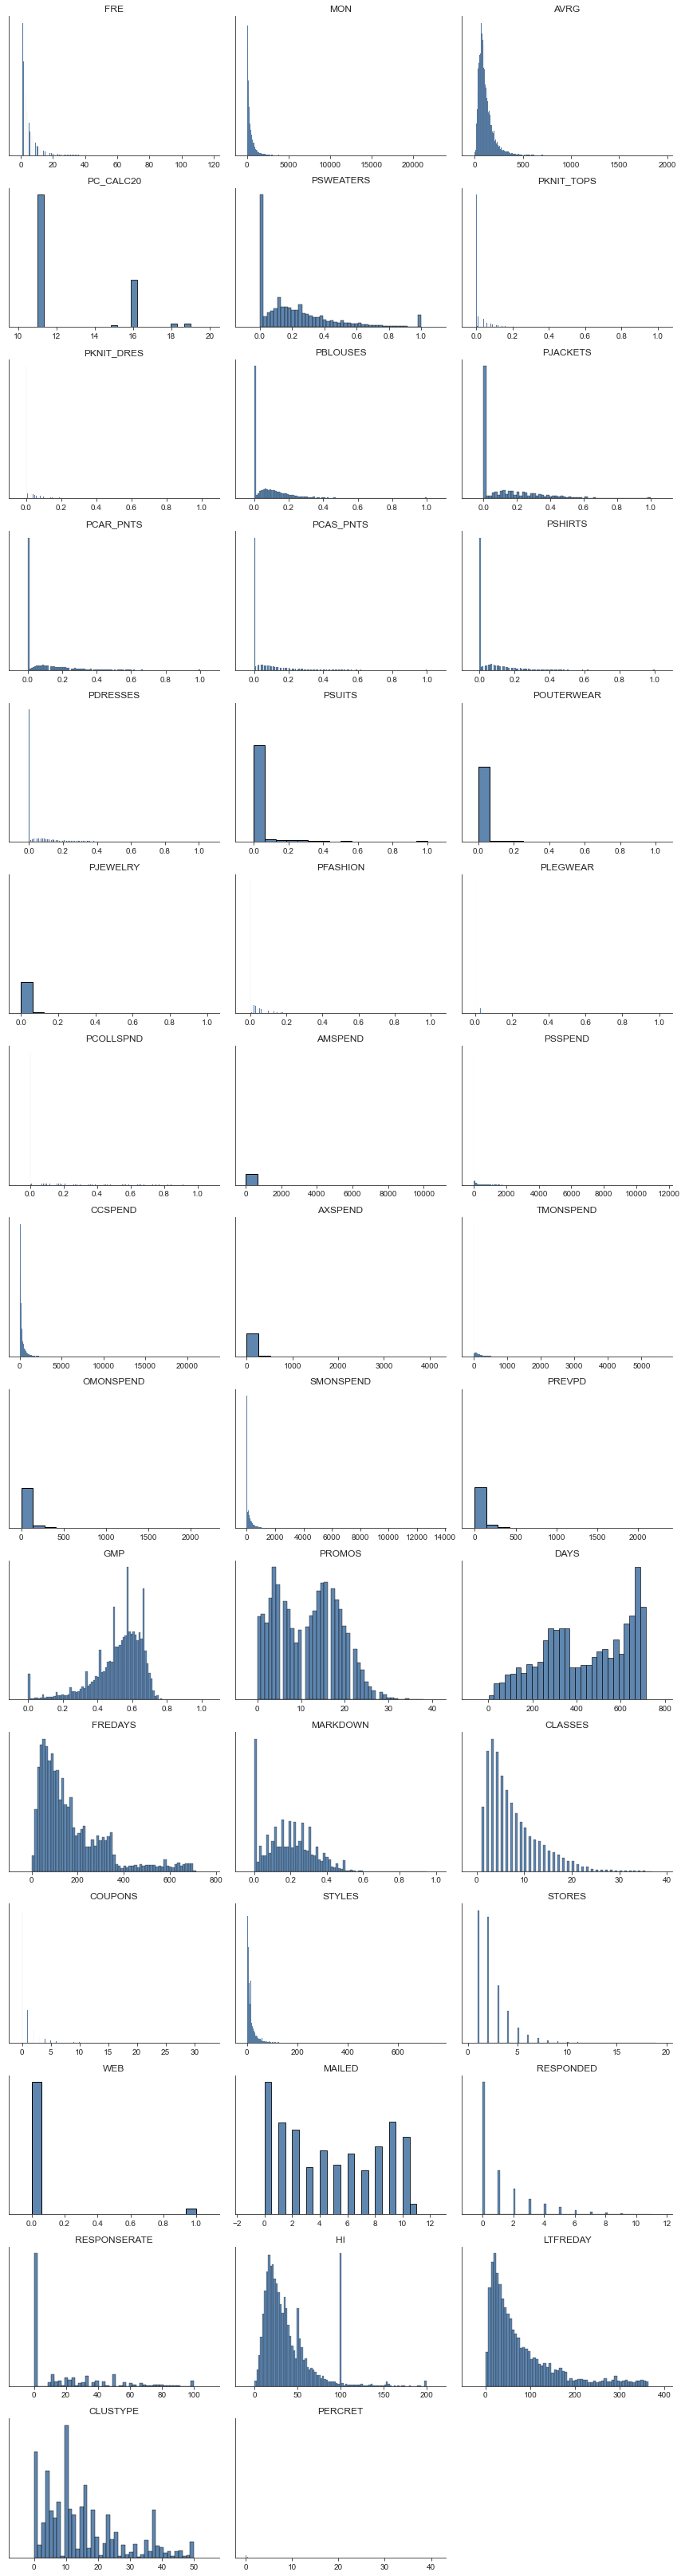

In [16]:
from tutorial4 import distplots

distplots(store[num]) 
plt.show()

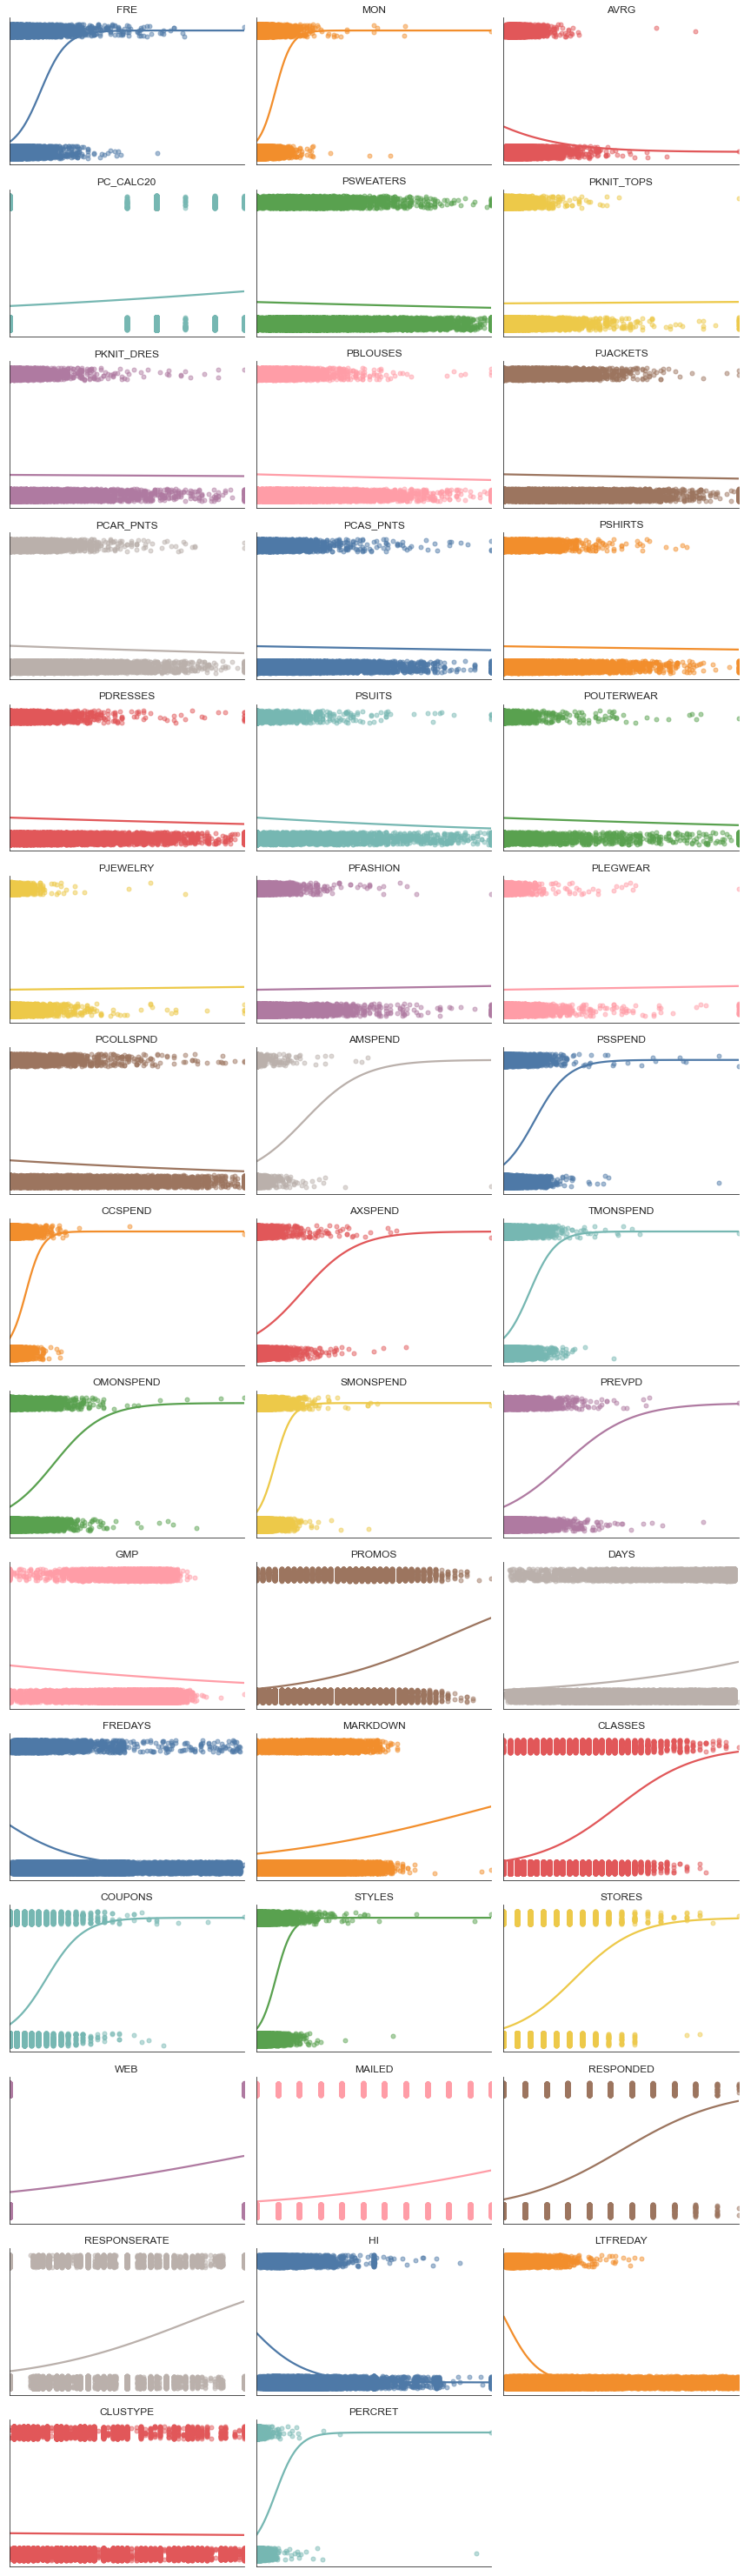

In [17]:
from tutorial4 import regplots

fig, ax = regplots(store[num], store['RESP'])
plt.show()

### relationship

In [18]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(store[num], store['RESP'], random_state=1)
results1 = pd.DataFrame(mi, index=num, columns=['MI'])

results1

,MI
FRE,0.080069
MON,0.055366
AVRG,0.020833
PC_CALC20,0.006259
PSWEATERS,0.021391
PKNIT_TOPS,0.028997
PKNIT_DRES,0.022318
PBLOUSES,0.027311
PJACKETS,0.029928
PCAR_PNTS,0.033378


In [19]:
from sklearn.preprocessing import OrdinalEncoder
features = OrdinalEncoder().fit_transform(store[categorical])

mi = mutual_info_classif(features, store['RESP'], n_neighbors=5, 
                         random_state=1, discrete_features=True)

results2 = pd.DataFrame(mi, index=categorical, columns=['MI'])
results2

,MI
CC_CARD,0.028327
VALPHON,0.006483


In [20]:
results = pd.concat([results1, results2], axis=0).sort_values(by='MI', ascending=False).round(4)
results.round(4)

,MI
LTFREDAY,0.1059
FRE,0.0801
STYLES,0.0729
FREDAYS,0.0648
CLASSES,0.0639
MON,0.0554
RESPONDED,0.0553
RESPONSERATE,0.0523
SMONSPEND,0.0514
COUPONS,0.0476


## model 

In [21]:
from sklearn.model_selection import GridSearchCV

### 1. Logistic Regression

In [22]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(store[num])
scaled_store_num = scaler.transform(store[num])


In [23]:
X = np.hstack((store[categorical], scaled_store_num))
y = store['RESP'].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size = 0.2,shuffle = False, random_state = 0)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train,test_size = 0.2,shuffle = False, random_state = 0)

print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(13913, 46) (13913,)
(3479, 46) (3479,)
(4348, 46) (4348,)


In [25]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(logit.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(logit.score(X_valid, y_valid)))

Accuracy on training set: 0.849
Accuracy on validation set: 0.841


In [26]:
param_grid_logit = {'C': [1, 0.1, 0.01, 0.001], 
                    'penalty': ['l1', 'l2']}

grid_search_logit = GridSearchCV(LogisticRegression(), param_grid=param_grid_logit, 
                                 cv=10, return_train_score=False)

grid_search_logit.fit(X_train, y_train)

print("Test set score: {:.3f}".format(grid_search_logit.score(X_valid, y_valid)))
print("Best parameters: {}".format(grid_search_logit.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search_logit.best_score_))
print("Best estimator:\n{}".format(grid_search_logit.best_estimator_))

Test set score: 0.841
Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.848
Best estimator:
LogisticRegression(C=1)


In [27]:
logit = grid_search_logit.best_estimator_

In [28]:
predictors = num + categorical
predictors

['FRE',
 'MON',
 'AVRG',
 'PC_CALC20',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',
 'AMSPEND',
 'PSSPEND',
 'CCSPEND',
 'AXSPEND',
 'TMONSPEND',
 'OMONSPEND',
 'SMONSPEND',
 'PREVPD',
 'GMP',
 'PROMOS',
 'DAYS',
 'FREDAYS',
 'MARKDOWN',
 'CLASSES',
 'COUPONS',
 'STYLES',
 'STORES',
 'WEB',
 'MAILED',
 'RESPONDED',
 'RESPONSERATE',
 'HI',
 'LTFREDAY',
 'CLUSTYPE',
 'PERCRET',
 'CC_CARD',
 'VALPHON']

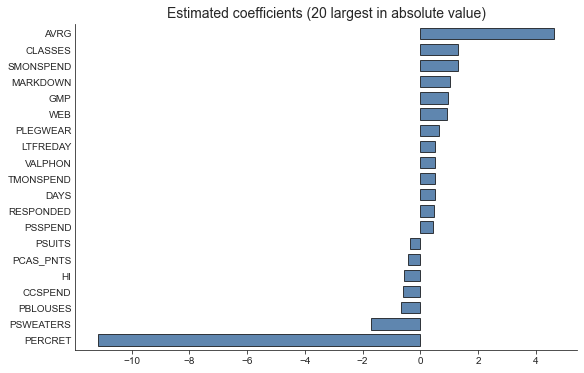

In [29]:
from tutorial4 import coefplot  

coefplot(logit, predictors)
plt.show()

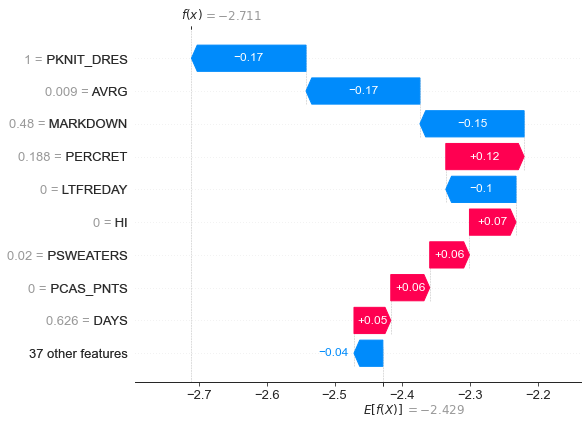

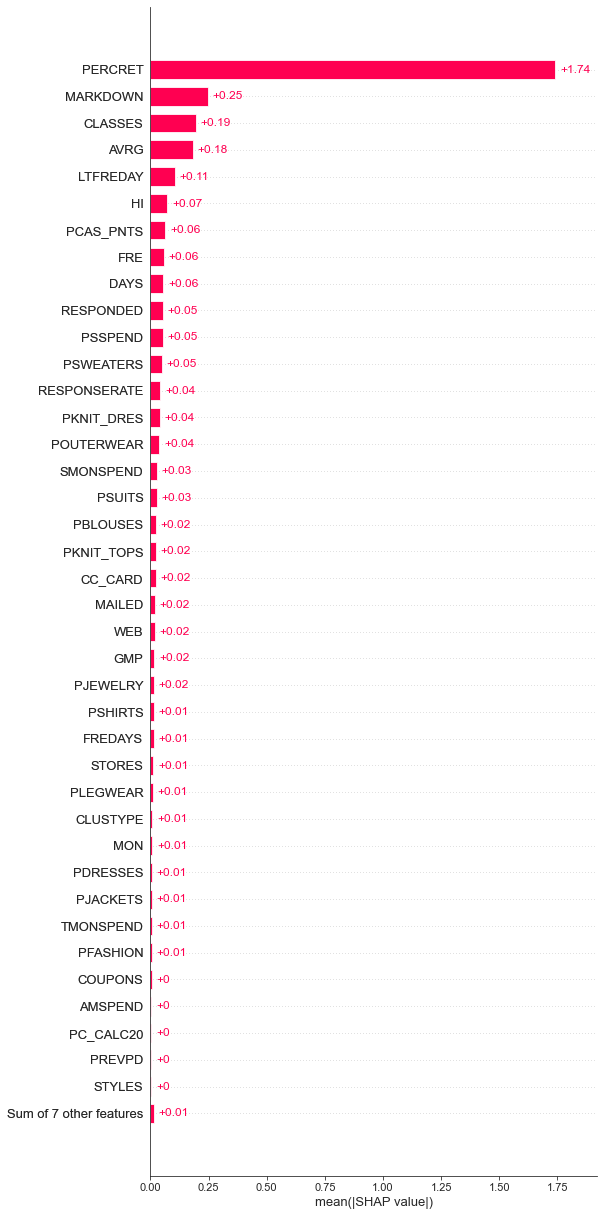

In [30]:
X_df = pd.DataFrame(X, columns = predictors)

import shap
shap.initjs()

explainer = shap.Explainer(logit, X_df)
shap_values = explainer(X_df)
shap.plots.waterfall(shap_values[2])

shap.plots.bar(shap_values, max_display = 40)

### 2.decision tree 

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on valid set: {:.3f}".format(tree.score(X_valid, y_valid)))

Accuracy on training set: 0.853
Accuracy on valid set: 0.840


In [32]:
param_grid_tree = {'criterion': ['entropy'], 
                   'max_depth': [3, 5, 7, 9], 
                   'random_state': [27]}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_tree, 
                                 cv=5, return_train_score=False)

grid_search_tree.fit(X_train, y_train)

print("Test set score: {:.3f}".format(grid_search_tree.score(X_valid, y_valid)))
print("Best parameters: {}".format(grid_search_tree.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search_tree.best_score_))
print("Best estimator:\n{}".format(grid_search_tree.best_estimator_))

Test set score: 0.840
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'random_state': 27}
Best cross-validation score: 0.852
Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=27)


In [33]:
tree = grid_search_tree.best_estimator_

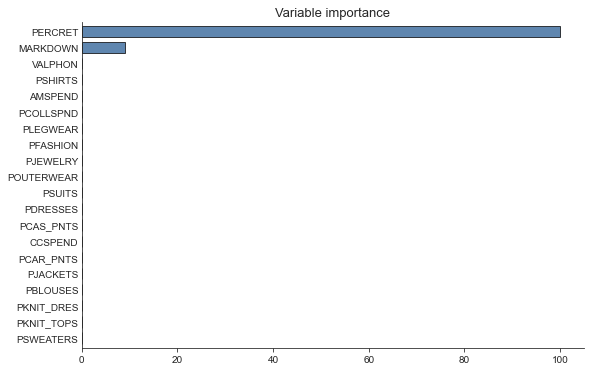

In [34]:
from tutorial9 import plot_feature_importance

plot_feature_importance(tree, labels = predictors)
plt.show()

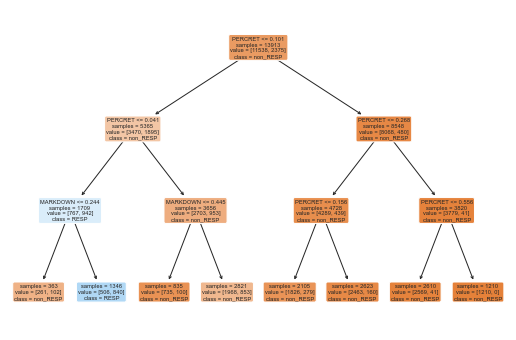

In [35]:
from sklearn.tree import plot_tree

plot_tree(tree, feature_names = predictors, class_names=['non_RESP','RESP'], impurity=False,
          rounded=True, filled = True)
plt.show()

### 3.Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=27)
rf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(rf.score(X_valid, y_valid)))

Accuracy on training set: 0.900
Accuracy on validation set: 0.843


In [37]:
param_grid_RF = {'n_estimators': [100, 200, 300], 
                 'max_depth': [5, 10, 15], 
                 'random_state': [27]}

grid_search_RF = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_RF, 
                              cv=5, return_train_score=False)

grid_search_RF.fit(X_train, y_train)

print("Test set score: {:.3f}".format(grid_search_RF.score(X_valid, y_valid)))
print("Best parameters: {}".format(grid_search_RF.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search_RF.best_score_))
print("Best estimator:\n{}".format(grid_search_RF.best_estimator_))

Test set score: 0.843
Best parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 27}
Best cross-validation score: 0.851
Best estimator:
RandomForestClassifier(max_depth=10, random_state=27)


In [38]:
rf = grid_search_RF.best_estimator_

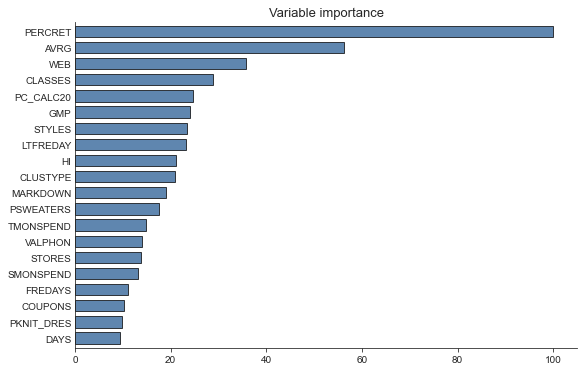

In [39]:
from tutorial9 import plot_feature_importance

plot_feature_importance(rf, labels = predictors)
plt.show()

### 4.Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate = 0.01,n_estimators = 10)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(gb.score(X_valid, y_valid)))

Accuracy on training set: 0.829
Accuracy on validation set: 0.822


In [41]:
param_grid_gb = {'learning_rate': [0.001, 0.01, 0.02], 
                 'max_depth': [5, 10, 15], 
                 'n_estimators': [10,15,20]}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, 
                              cv=5, return_train_score=False)

grid_search_gb.fit(X_train, y_train)

print("Test set score: {:.3f}".format(grid_search_gb.score(X_valid, y_valid)))
print("Best parameters: {}".format(grid_search_gb.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search_gb.best_score_))
print("Best estimator:\n{}".format(grid_search_gb.best_estimator_))

Test set score: 0.822
Best parameters: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 10}
Best cross-validation score: 0.829
Best estimator:
GradientBoostingClassifier(learning_rate=0.001, max_depth=5, n_estimators=10)


In [42]:
gb = grid_search_gb.best_estimator_

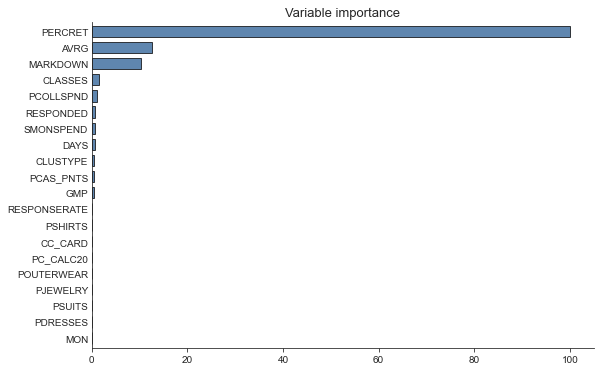

In [43]:
from tutorial9 import plot_feature_importance

plot_feature_importance(gb, labels = predictors)
plt.show()

### 5. model stack

In [44]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression
import warnings

warnings.simplefilter('ignore')

RANDOM_SEED = 42

clf1 = logit
clf2 = tree
clf3 = rf
clf4 = gb
lr = LogisticRegression()

stack = StackingCVClassifier(classifiers=[clf1, clf2, clf3,clf4],
                            meta_classifier=lr,
                            random_state=RANDOM_SEED,
                             use_probas = True,
                             cv = 5,
                             store_train_meta_features = True)
stack.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(stack.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(stack.score(X_valid, y_valid)))

Accuracy on training set: 0.850
Accuracy on validation set: 0.841


In [45]:
stack.meta_clf_.coef_

array([[-2.52802593,  2.52714208, -1.27497665,  1.27409279,  0.23995681,
        -0.24084066, -0.26337124,  0.26248739]])

# evaluation

In [46]:
import pandas as pd

data = {"Actual/Predicted":  ["no-response", "response"],
        "no-response": [0,5],
        "response" : [1,0]
        }

df = pd.DataFrame(data)

print (df.to_string(index=False))

Actual/Predicted  no-response  response
     no-response            0         1
        response            5         0


logistic Regression


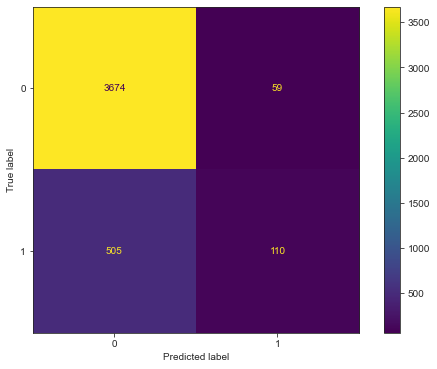

Decision Tree


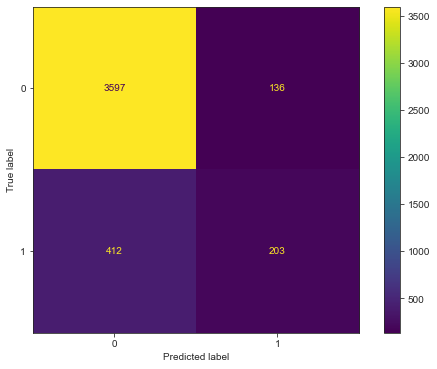

Random Forest


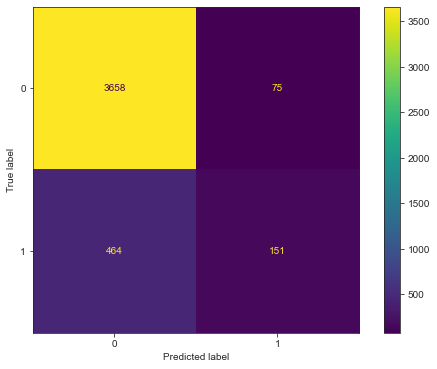

Gradient Boosting


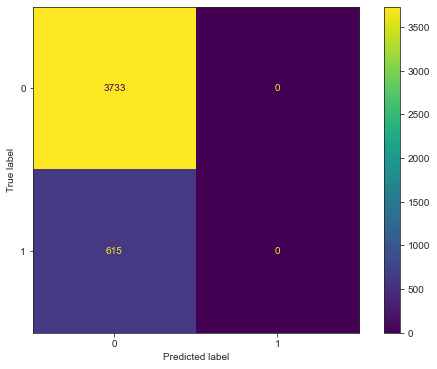

Stacking


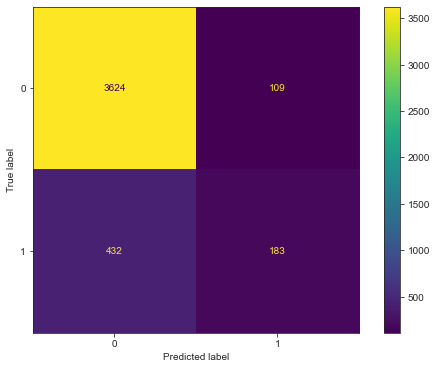

,Estimated risk,SE,Accuracy,Sensitivity,Specificity,Precision,AUC,Cross-entropy
logistic Regression,0.59430,0.02428,0.87029,0.17886,0.98420,0.65089,0.85235,0.29827
Decision Tree,0.50506,0.02221,0.87397,0.33008,0.96357,0.59882,0.83657,0.30427
Random Forest,0.55083,0.02340,0.87603,0.24553,0.97991,0.66814,0.84241,0.30546
Gradient Boosting,0.70722,0.02642,0.85856,0.00000,1.00000,0.00000,0.84593,0.40857
Stacking,0.52185,0.02268,0.87557,0.29756,0.97080,0.62671,0.85455,0.30609


In [47]:
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, log_loss
from sklearn.metrics import accuracy_score
# Initialise table
columns=['Estimated risk', 'SE', 'Accuracy','Sensitivity','Specificity','Precision','AUC','Cross-entropy']
rows=['logistic Regression', 'Decision Tree', 'Random Forest','Gradient Boosting','Stacking']

results =pd.DataFrame(0.0, columns=columns, index=rows)

# Methods
methods = [logit, tree, rf,gb, stack]

# Compute test predictions
y_valid = np.ravel(y_test) #evluation on test data which we already split above
y_prob = np.zeros((len(y_valid), len(rows)))

for i, method in enumerate(methods):
    
    y_prob[:, i] = method.predict_proba(X_test)[:,1]
    y_pred =method.predict(X_test)
    
    loss = 5 * ((y_pred != y_valid) & (y_pred ==0)) + 1 * ((y_pred != y_valid) & (y_pred ==1)) #loss matrix
    tn, fp, fn, tp = confusion_matrix(y_valid,y_pred).ravel()
    cm = confusion_matrix(y_valid,y_pred, labels=rf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)#confusion matrix
    print("{}".format(rows[i]))
    disp.plot()
    plt.show()
    
    results.iloc[i, 0] = np.mean(loss)
    results.iloc[i, 1] = np.std(loss)/np.sqrt(len(y_valid))
    results.iloc[i, 2] = accuracy_score(y_valid, y_pred)
    results.iloc[i, 3] = tp/(tp+fn)
    results.iloc[i, 4] = tn/(tn+fp)
    results.iloc[i, 5] = precision_score(y_valid, y_pred)
    results.iloc[i, 6] = roc_auc_score(y_valid, y_prob[:, i])
    results.iloc[i, 7] = log_loss(y_valid, y_prob[:, i])

results.round(5)

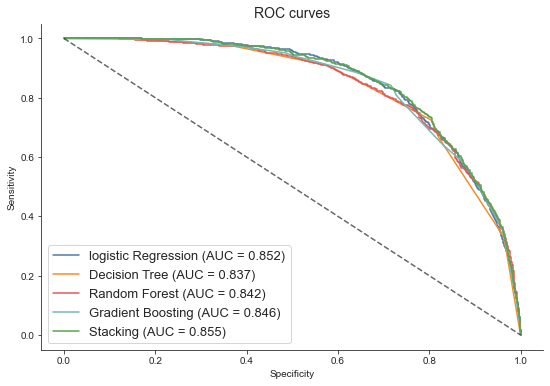

In [48]:
from tutorial4 import rocplot

fig, ax = rocplot(y_valid, y_prob, labels=pd.Series(rows))
plt.show()